In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(2, 2), transparent=False, format="pdf")


-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bioservices         1.7.11
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gridfs              NA
gseapy              0.10.4
h5py                2.10.0
idna                2.10
igraph     

In [4]:
Mock_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D4PI/outs/filtered_feature_bc_matrix.h5')
Mock_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D7PI/outs/filtered_feature_bc_matrix.h5')
Mock_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D10PI/outs/filtered_feature_bc_matrix.h5')

Mock_Heart_D4PI_sc.var_names_make_unique()
T1L_WT_Heart_D4PI_sc.var_names_make_unique()
Mock_Heart_D7PI_sc.var_names_make_unique()
T1L_WT_Heart_D7PI_sc.var_names_make_unique()
Mock_Heart_D10PI_sc.var_names_make_unique()
T1L_WT_Heart_D10PI_sc.var_names_make_unique()

reading ./../scData/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
samples = ["Heart_Mock_D4PI", "Heart_T1L-WT_D4PI", "Heart_Mock_D7PI", "Heart_T1L-WT_D7PI", "Heart_Mock_D10PI", "Heart_T1L-WT_D10PI"]


In [6]:
# heart_infection_sc = Mock_Heart_D4PI_sc.concatenate(T1L_Heart_D4PI_sc, KO287_Heart_D4PI_sc, 
#                                                     Mock_Heart_D7PI_sc, T1L_Heart_D7PI_sc,
#                                                     KO287_Heart_D7PI_sc, 
#                                                     batch_key= "sample", batch_categories=samples,
#                                                     index_unique="-")
heart_infection_sc = Mock_Heart_D4PI_sc.concatenate(T1L_WT_Heart_D4PI_sc, Mock_Heart_D7PI_sc, T1L_WT_Heart_D7PI_sc,
                                                             Mock_Heart_D10PI_sc, T1L_WT_Heart_D10PI_sc,
                                                    batch_key= "sample", batch_categories=samples,
                                                    index_unique="-")

In [7]:
heart_infection_sc.obs_names_make_unique()
heart_infection_sc.var_names_make_unique()
print(heart_infection_sc.shape)

(37691, 54848)


In [8]:
reoviral_genes = [name for name in heart_infection_sc.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc.var_names, reoviral_genes)
heart_infection_sc = heart_infection_sc[:, ~reoviral_genes_indicator]
heart_infection_sc.var_names = [name.split("_")[1] for name in heart_infection_sc.var_names]
heart_infection_sc.obs = heart_infection_sc.obs.join(viral_expression.astype(int))
print(heart_infection_sc.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(37691, 54838)


In [9]:
sc.pp.filter_cells(heart_infection_sc, min_counts=1)
sc.pp.filter_genes(heart_infection_sc, min_cells=1)

filtered out 1 cells that have less than 1 counts
filtered out 21699 genes that are detected in less than 1 cells


In [10]:
heart_infection_sc.var['mt'] = heart_infection_sc.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(heart_infection_sc, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [11]:
heart_infection_sc.obs['total_viral'] = viral_expression.sum(axis=1).astype(int)
heart_infection_sc.obs['pct_viral'] = ((heart_infection_sc.obs['total_viral']) / (heart_infection_sc.obs['total_viral'] + heart_infection_sc.obs['total_counts']))

In [13]:
heart_infection_sc.obs["stage"] = [x.split("_")[2] for x in heart_infection_sc.obs["sample"]]
heart_infection_sc.obs["state"] = [x.split("_")[1] for x in heart_infection_sc.obs["sample"]]
heart_infection_sc.obs["stage"] = heart_infection_sc.obs["stage"].astype("category")
heart_infection_sc.obs["state"] = heart_infection_sc.obs["state"].astype("category")
heart_infection_sc.obs["stage"].cat.reorder_categories(new_categories=["D4PI", "D7PI", "D10PI"], inplace = True)
heart_infection_sc.obs["state"].cat.reorder_categories(new_categories=["Mock", "T1L-WT"], inplace = True)
heart_infection_sc.obs["condition"] = [heart_infection_sc.obs["state"][i] + "_" + heart_infection_sc.obs["stage"][i] for i in range(heart_infection_sc.shape[0])]
heart_infection_sc.obs["condition"] = heart_infection_sc.obs["condition"].astype("category")
heart_infection_sc.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "Mock_D7PI", "Mock_D10PI", "T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"], inplace = True)

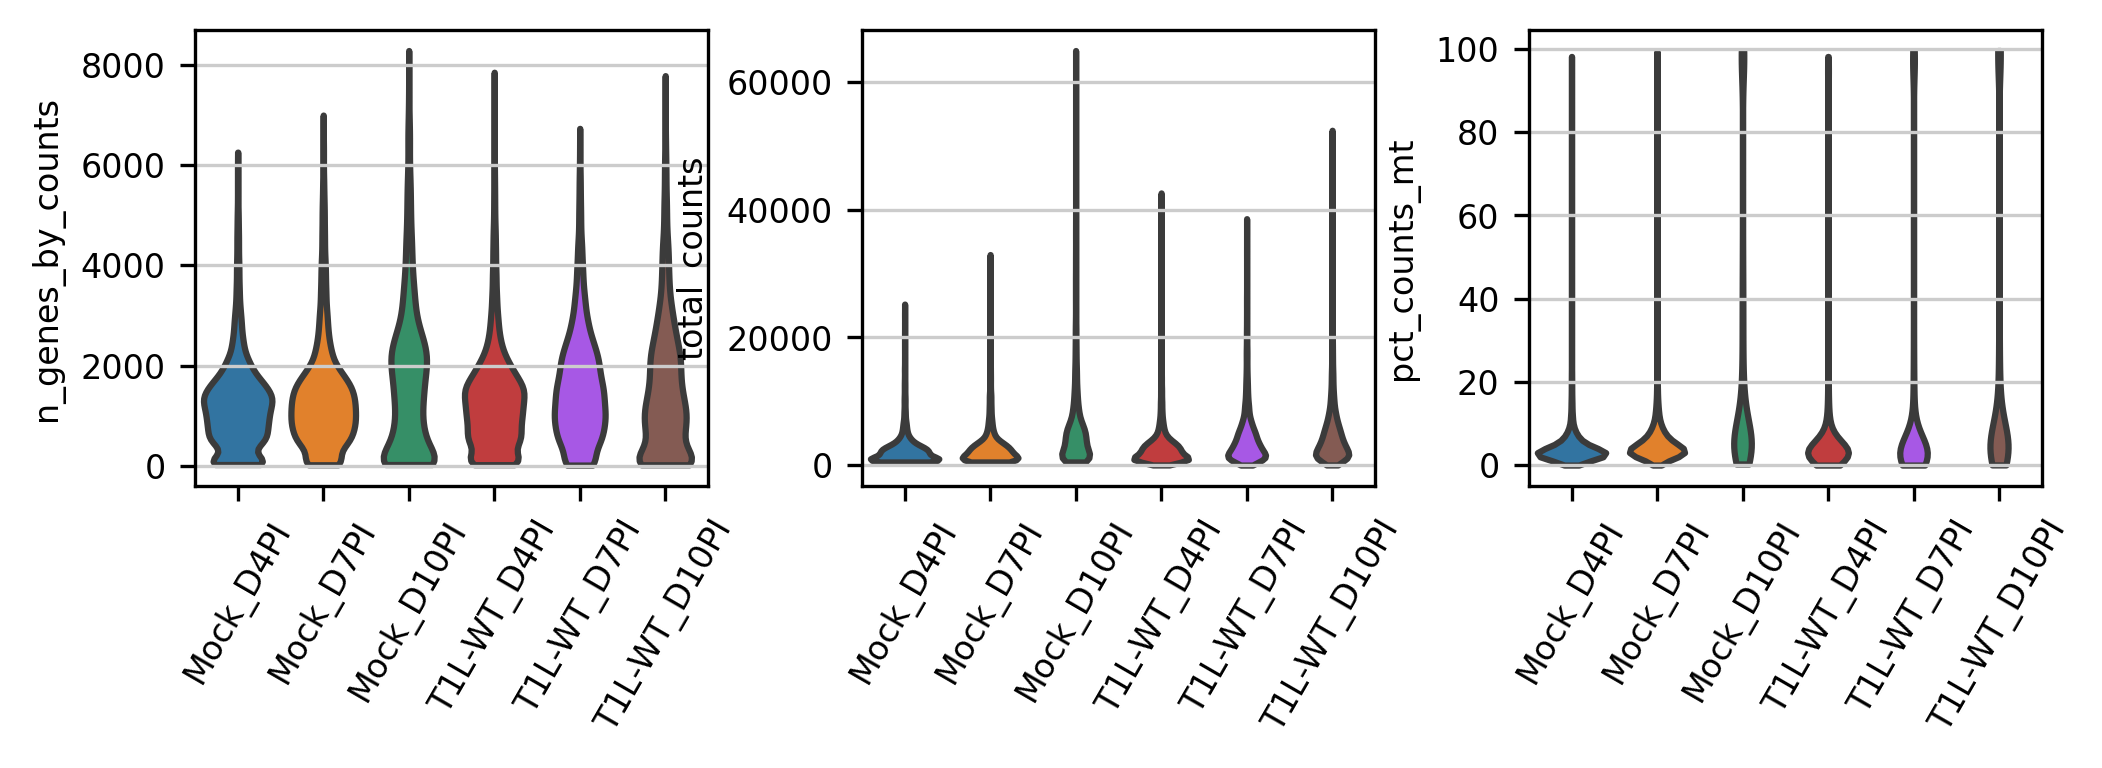

In [23]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=8, frameon=True, figsize=(3, 2), transparent=False, format="pdf")
sc.pl.violin(heart_infection_sc, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             stripplot=False, scale="area", groupby = "condition", rotation=60, )

In [24]:
np.sum(heart_infection_sc.obs["total_viral"])

NameError: name 'heart_infection_sc_4samples_no_viral_genes' is not defined

In [25]:
heart_infection_sc = heart_infection_sc[heart_infection_sc.obs.pct_counts_mt < 25, :]

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [26]:
print(heart_infection_sc.shape)

(35211, 33139)


In [27]:
sc.pp.filter_cells(heart_infection_sc, min_genes=200)
sc.pp.filter_genes(heart_infection_sc, min_cells=10)

filtered out 3527 cells that have less than 200 genes expressed


Trying to set attribute `.obs` of view, copying.


filtered out 10382 genes that are detected in less than 10 cells


In [28]:
print(heart_infection_sc.shape)

(31684, 22757)


In [29]:
heart_infection_sc.obs["condition"].value_counts()

Mock_D7PI       7096
Mock_D4PI       6596
T1L-WT_D4PI     5970
T1L-WT_D7PI     5086
Mock_D10PI      3483
T1L-WT_D10PI    3453
Name: condition, dtype: int64

In [ ]:
# heart_infection_sc.write_h5ad("./../pyobjs_github/heart_infection_sc_raw_counts.h5ad")

In [30]:
sc.pp.normalize_total(heart_infection_sc, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [31]:
sc.pp.log1p(heart_infection_sc)

In [32]:
sc.pp.highly_variable_genes(heart_infection_sc, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


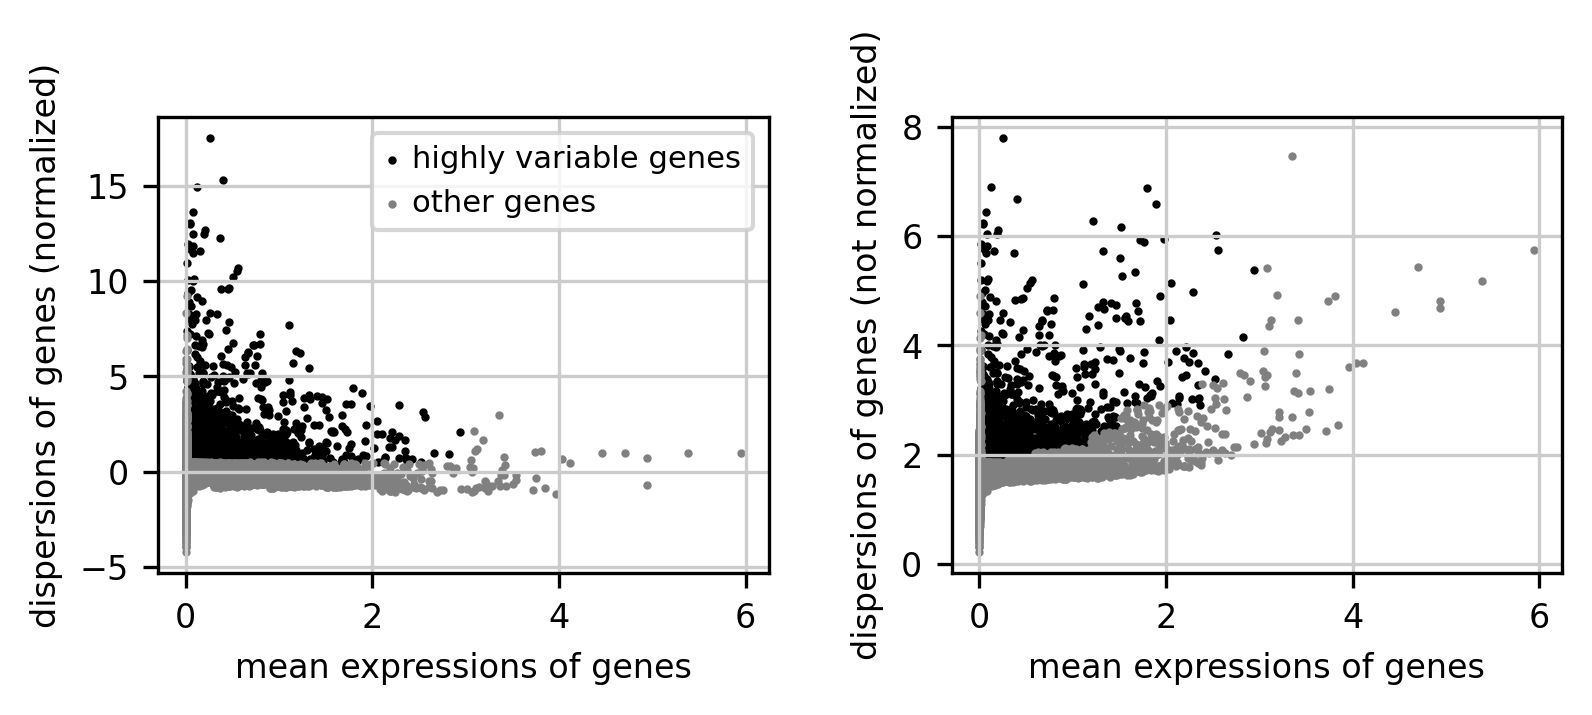

In [33]:
sc.pl.highly_variable_genes(heart_infection_sc, )

In [34]:
s_genes = list(pd.read_csv("./../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)heart_infection_sc

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [35]:
sc.tl.score_genes_cell_cycle(heart_infection_sc, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished: added
    'S_score', score of gene set (adata.obs).
    503 total control genes are used. (0:00:00)
computing score 'G2M_score'


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    543 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [36]:
heart_infection_sc.raw = heart_infection_sc
heart_infection_sc = heart_infection_sc[:, heart_infection_sc.var.highly_variable]


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [37]:
sc.pp.regress_out(heart_infection_sc, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:00:21)


In [38]:
sc.pp.scale(heart_infection_sc, max_value=10)

In [39]:
sc.tl.pca(heart_infection_sc, svd_solver = "arpack")

computing PCA
    on highly variable genes
    with n_comps=50


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished (0:00:13)


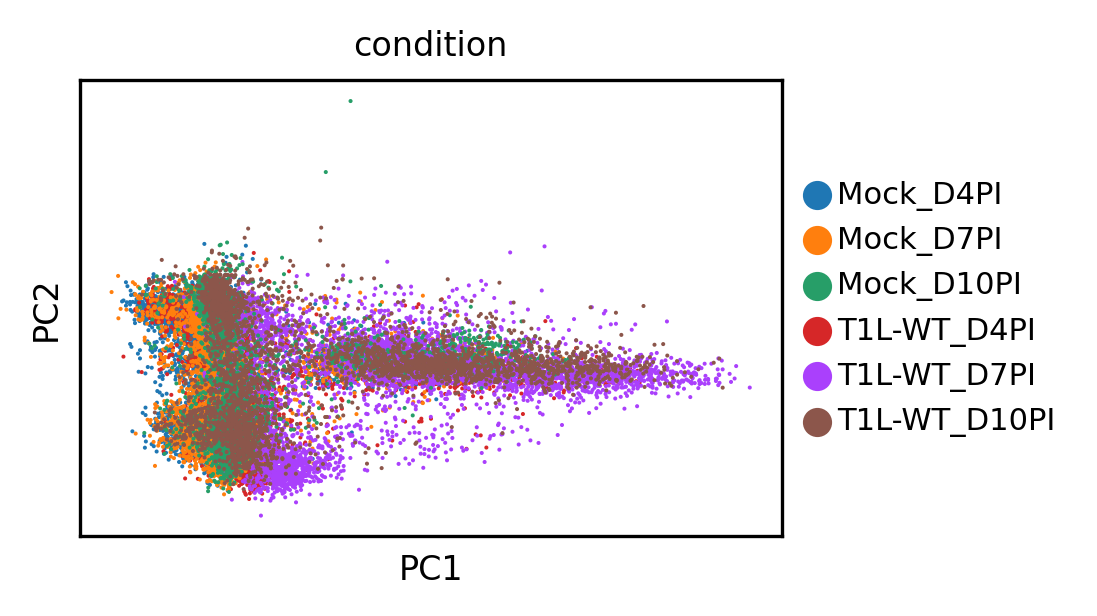

In [41]:
sc.pl.pca(heart_infection_sc, color = ["condition"])

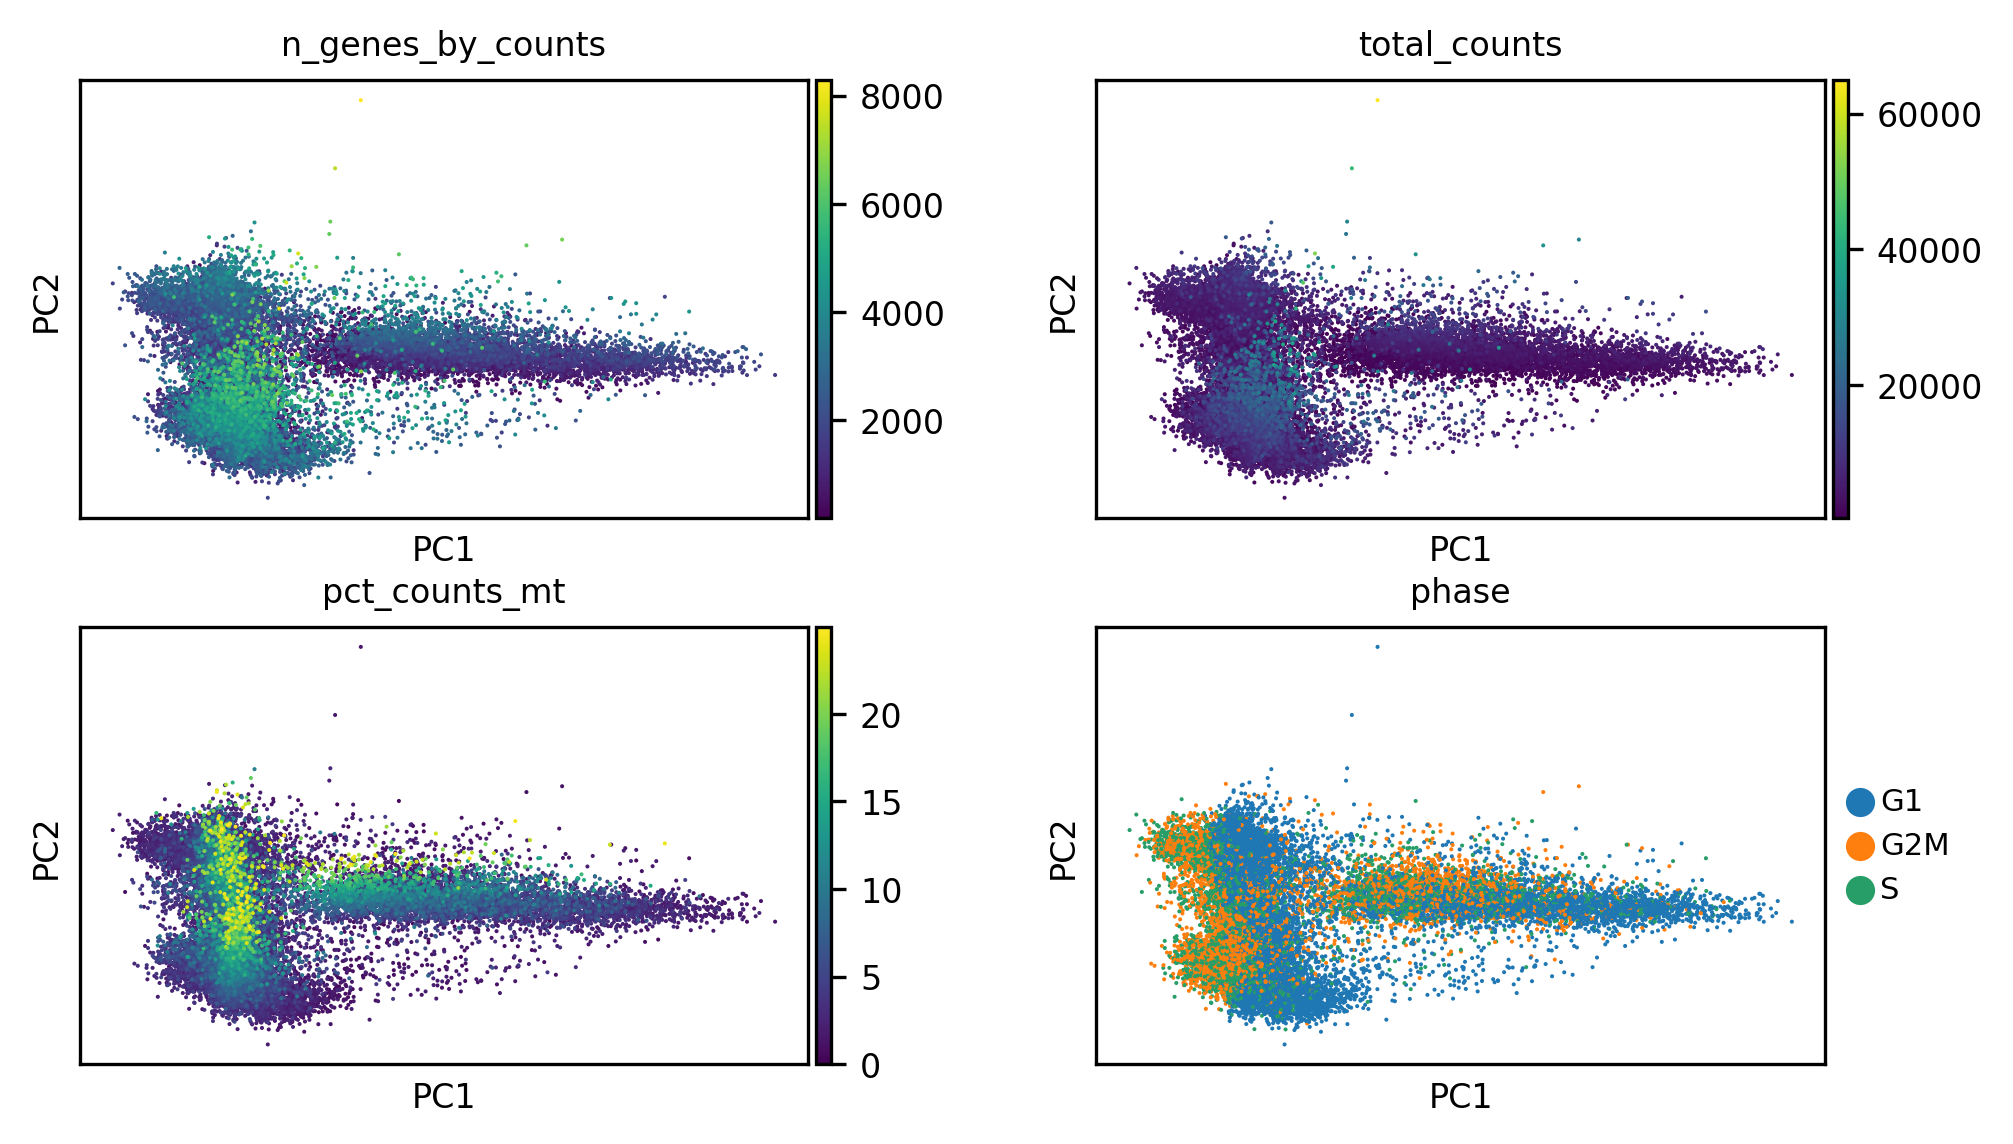

In [42]:
sc.pl.pca(heart_infection_sc, color = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'phase'], ncols=2)

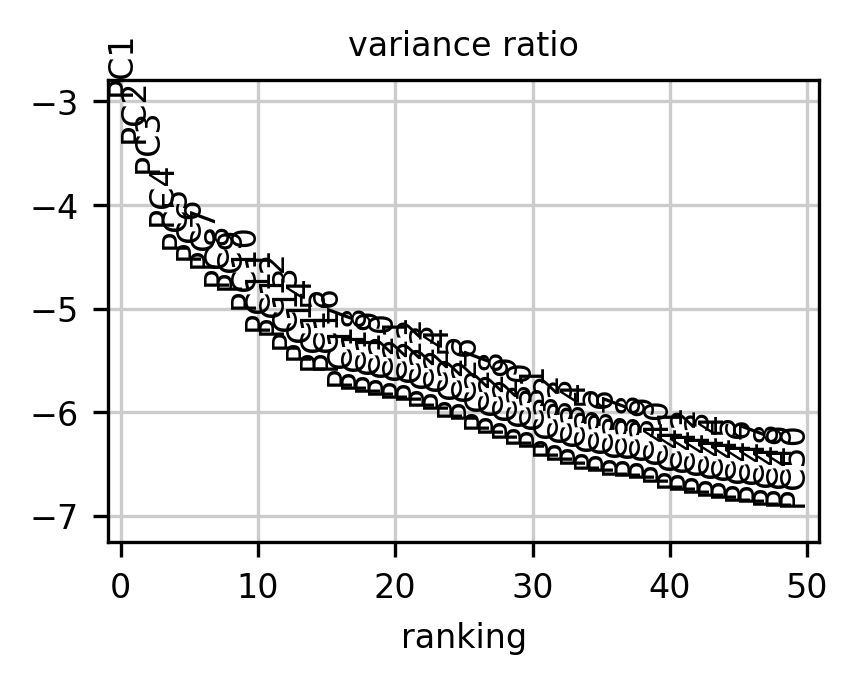

In [44]:
sc.pl.pca_variance_ratio(heart_infection_sc, n_pcs = 50, log=True)

In [47]:
heart_infection_sc.obsm["X_pca"]

array([[-3.1915057e+00, -1.1429001e+00,  2.9936191e-01, ...,
        -2.0319405e+00, -1.4310329e+00,  4.0696640e+00],
       [-5.3046675e+00, -9.5140085e+00,  9.5466769e-01, ...,
        -5.6467003e-01,  1.1157133e-02,  7.5844502e-01],
       [-1.0218929e+01, -7.1915774e+00, -6.7328944e+00, ...,
         4.6665716e-01,  1.1890375e-01, -1.3438069e+00],
       ...,
       [ 1.6761822e+01,  2.4328372e+00,  2.2510193e+01, ...,
         2.0574169e-01, -3.9777241e+00,  5.0850016e-01],
       [ 9.0334883e+00,  2.8495924e+00,  1.7325769e+01, ...,
         1.2463802e+00, -2.0413327e+00,  1.2192243e+00],
       [-5.7723465e+00,  9.7399549e+00, -6.1045951e-01, ...,
         6.4220500e-01,  1.3159600e+00, -3.4971029e-02]], dtype=float32)

In [49]:
sc.pp.neighbors(heart_infection_sc, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:47)


In [50]:
sc.tl.umap(heart_infection_sc)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


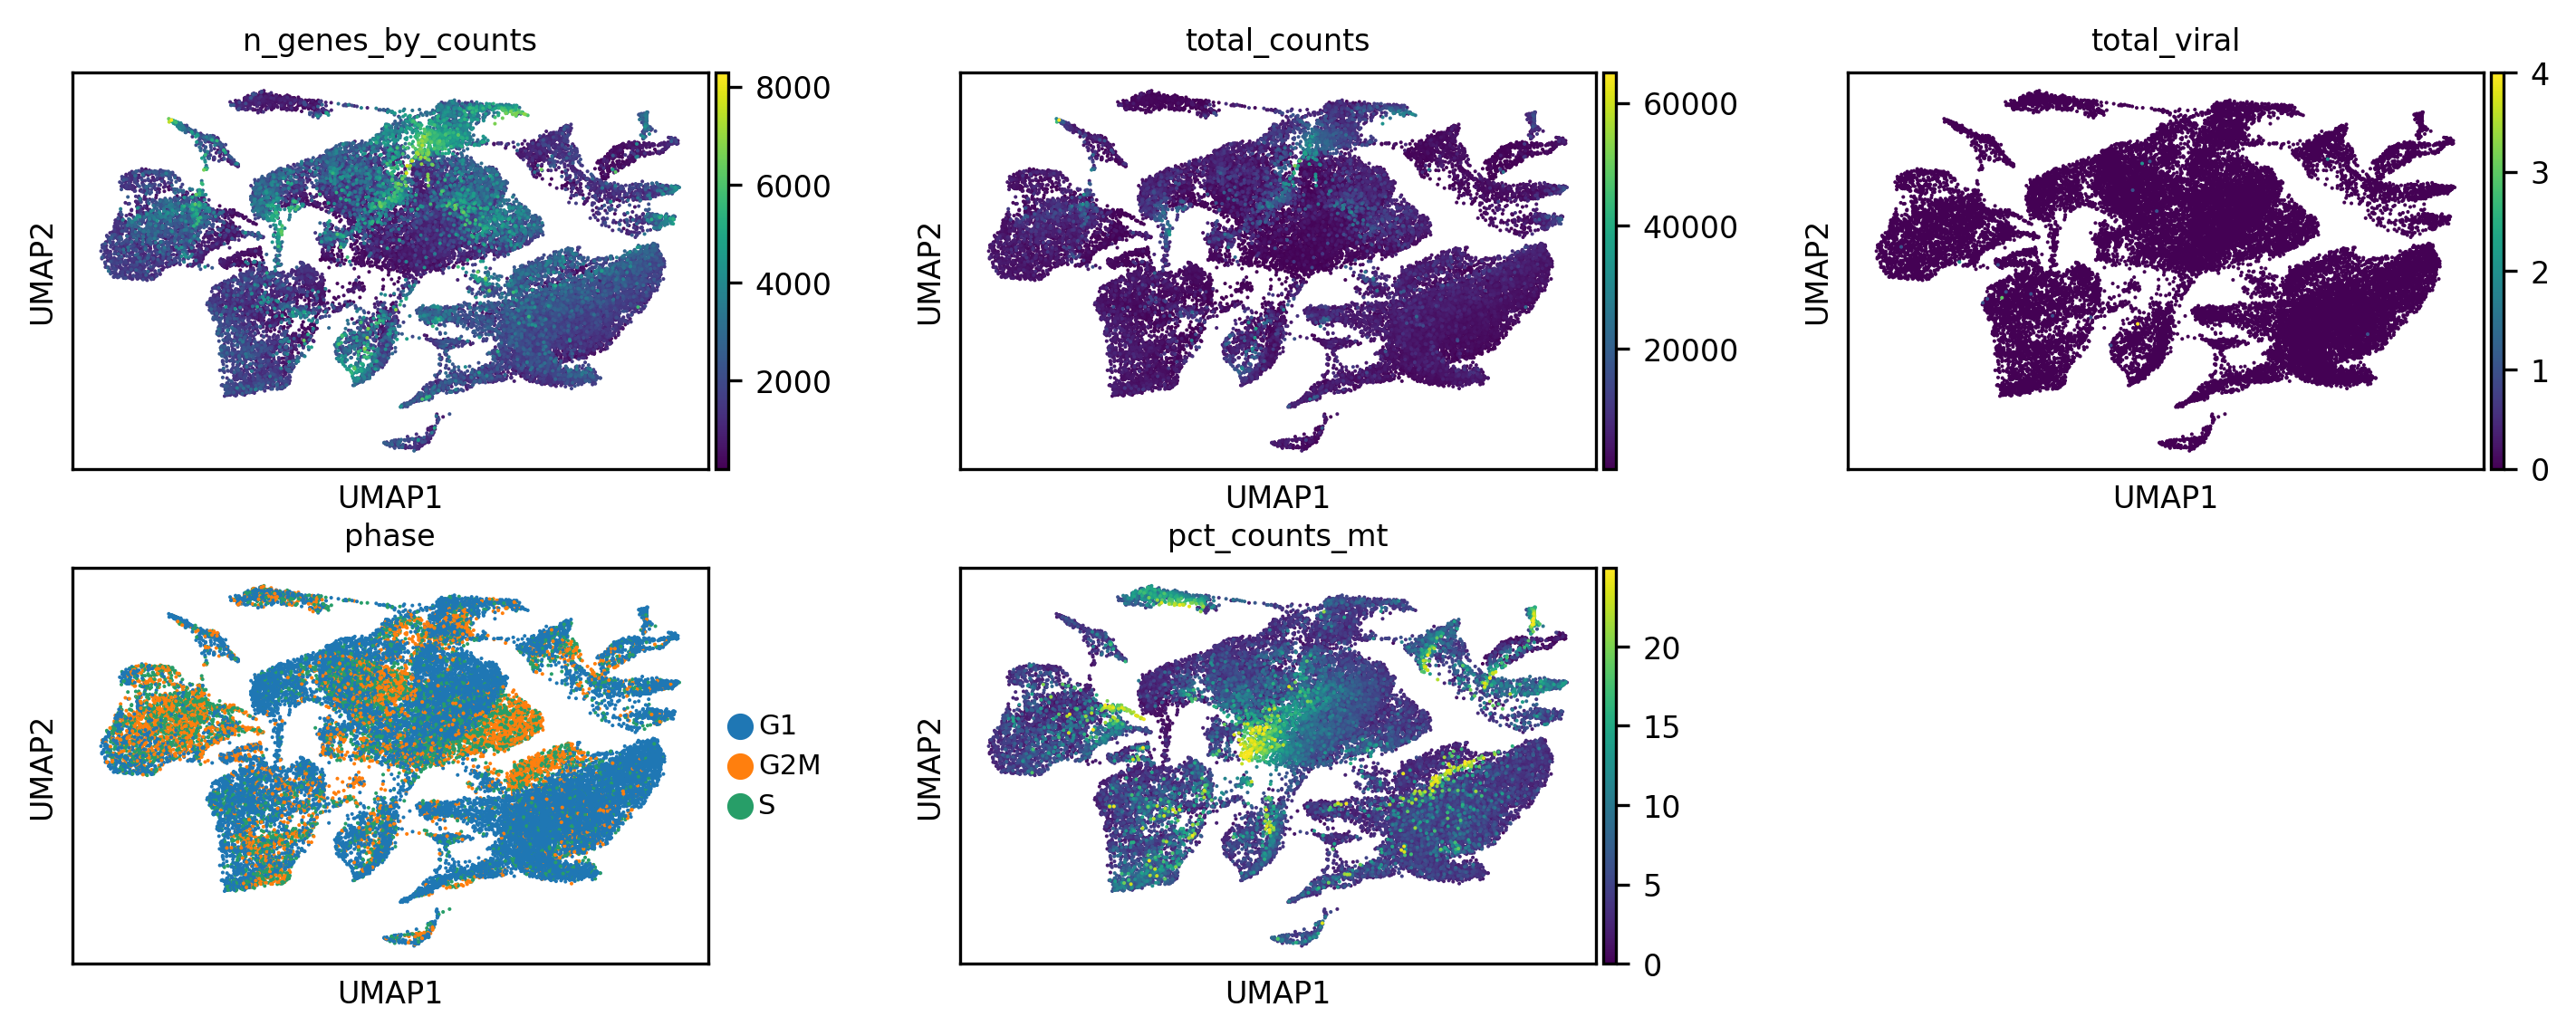

In [51]:
sc.pl.umap(heart_infection_sc, color = ['n_genes_by_counts', 'total_counts', 'total_viral', "phase", "pct_counts_mt"], ncols=3)

In [53]:
sc.tl.embedding_density(heart_infection_sc, groupby = "condition")

computing density on 'umap'
--> added
    'umap_density_condition', densities (adata.obs)
    'umap_density_condition_params', parameter (adata.uns)


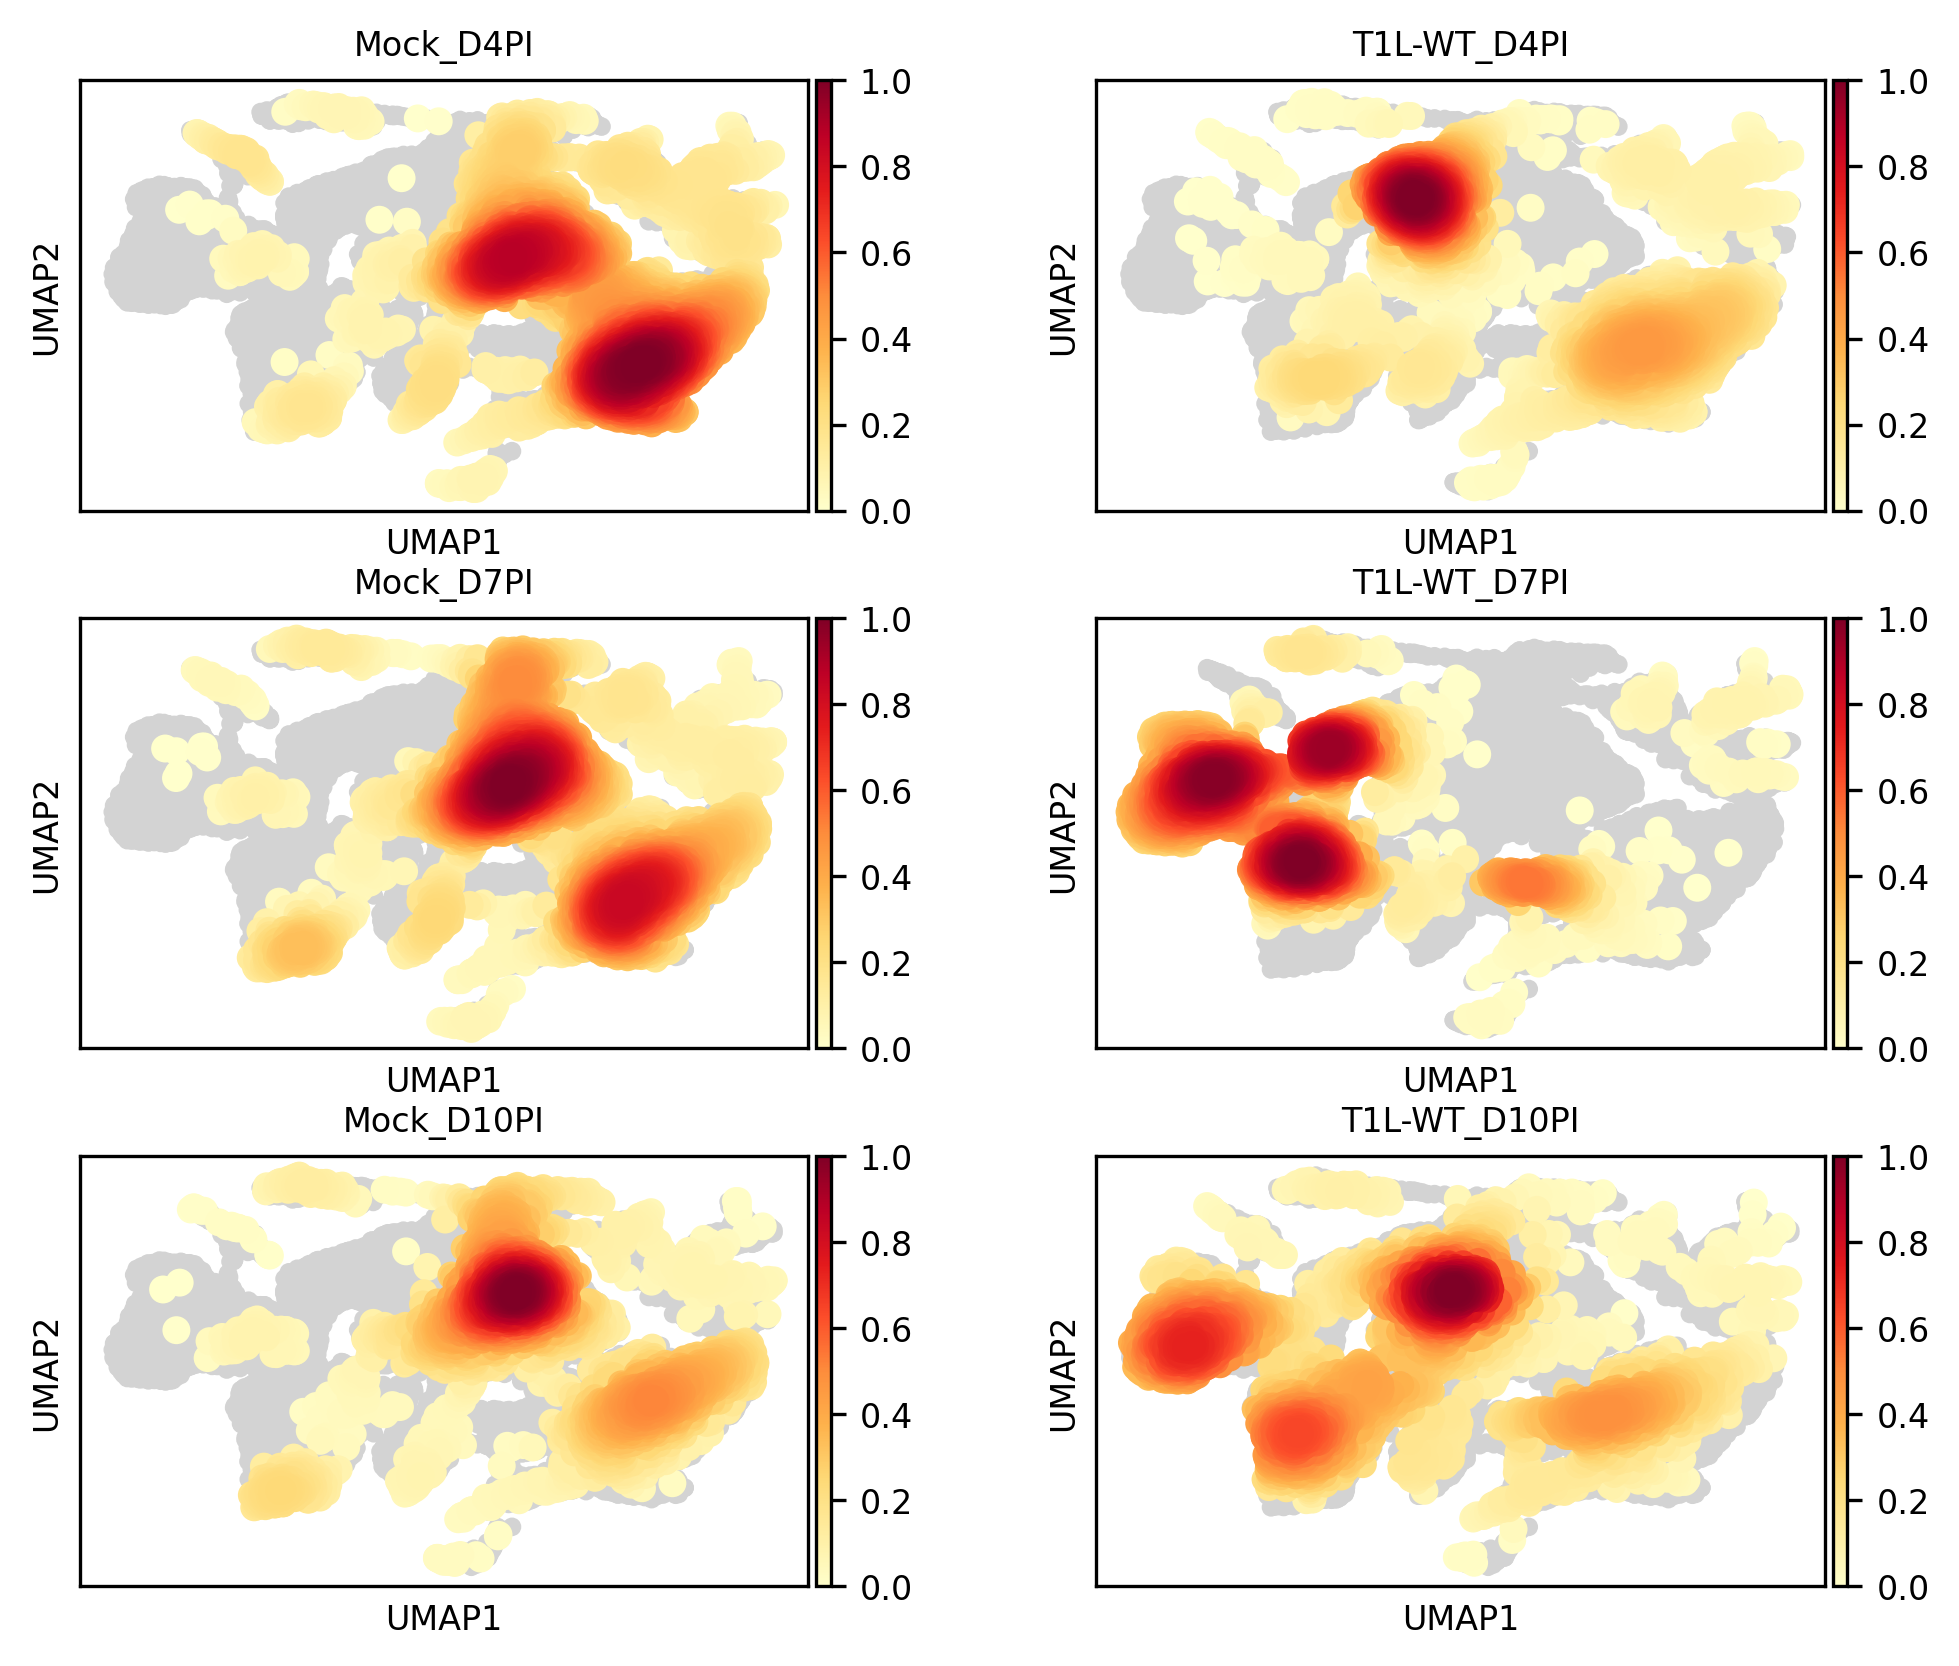

In [54]:
heart_infection_sc.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI",  "Mock_D7PI",  "T1L-WT_D7PI",  "Mock_D10PI", "T1L-WT_D10PI"], inplace = True)
sc.pl.embedding_density(heart_infection_sc, groupby = "condition", ncols=2) 

In [55]:
sc.tl.leiden(heart_infection_sc, key_added="leiden_0.5", resolution = 0.5)
sc.tl.leiden(heart_infection_sc, key_added="leiden_0.3", resolution = 0.3)
sc.tl.leiden(heart_infection_sc, key_added="leiden_0.1", resolution = 0.1)

running Leiden clustering
    finished: found 23 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:02)


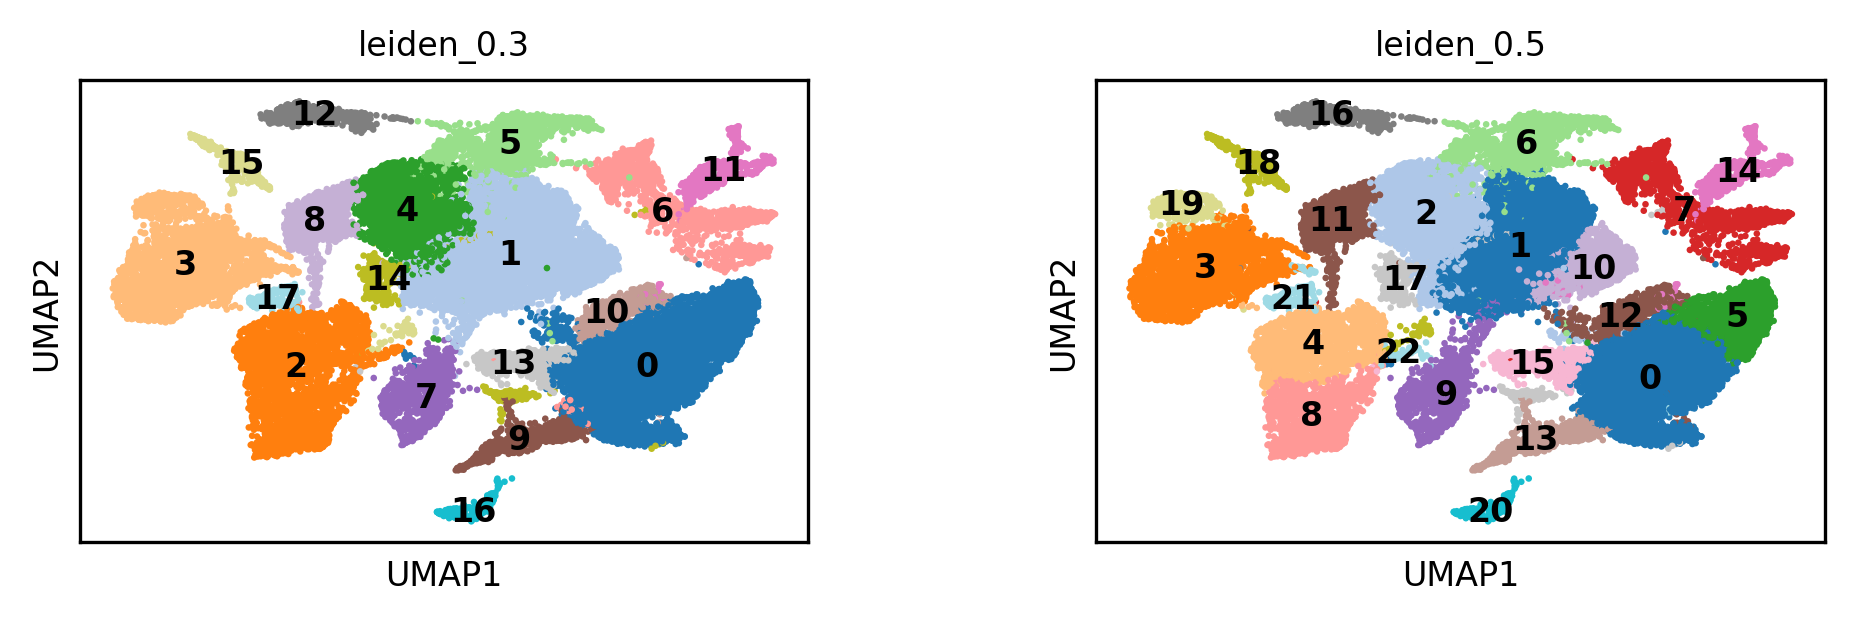

In [56]:
sc.pl.umap(heart_infection_sc, color = ['leiden_0.3', 'leiden_0.5'], legend_loc='on data', size=10, palette="tab20")

In [57]:
sc.tl.rank_genes_groups(heart_infection_sc, 'leiden_0.3', method='wilcoxon', key_added='rank_genes_groups_leiden_0.3')
sc.tl.rank_genes_groups(heart_infection_sc, 'leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_leiden_0.5')

ranking genes
    finished: added to `.uns['rank_genes_groups_leiden_0.3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:02)
ranking genes
    finished: added to `.uns['rank_genes_groups_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:04)


In [58]:
sc.tl.dendrogram(heart_infection_sc, "leiden_0.5", n_pcs=20)

    using 'X_pca' with n_pcs = 20
Storing dendrogram info using `.uns['dendrogram_leiden_0.5']`


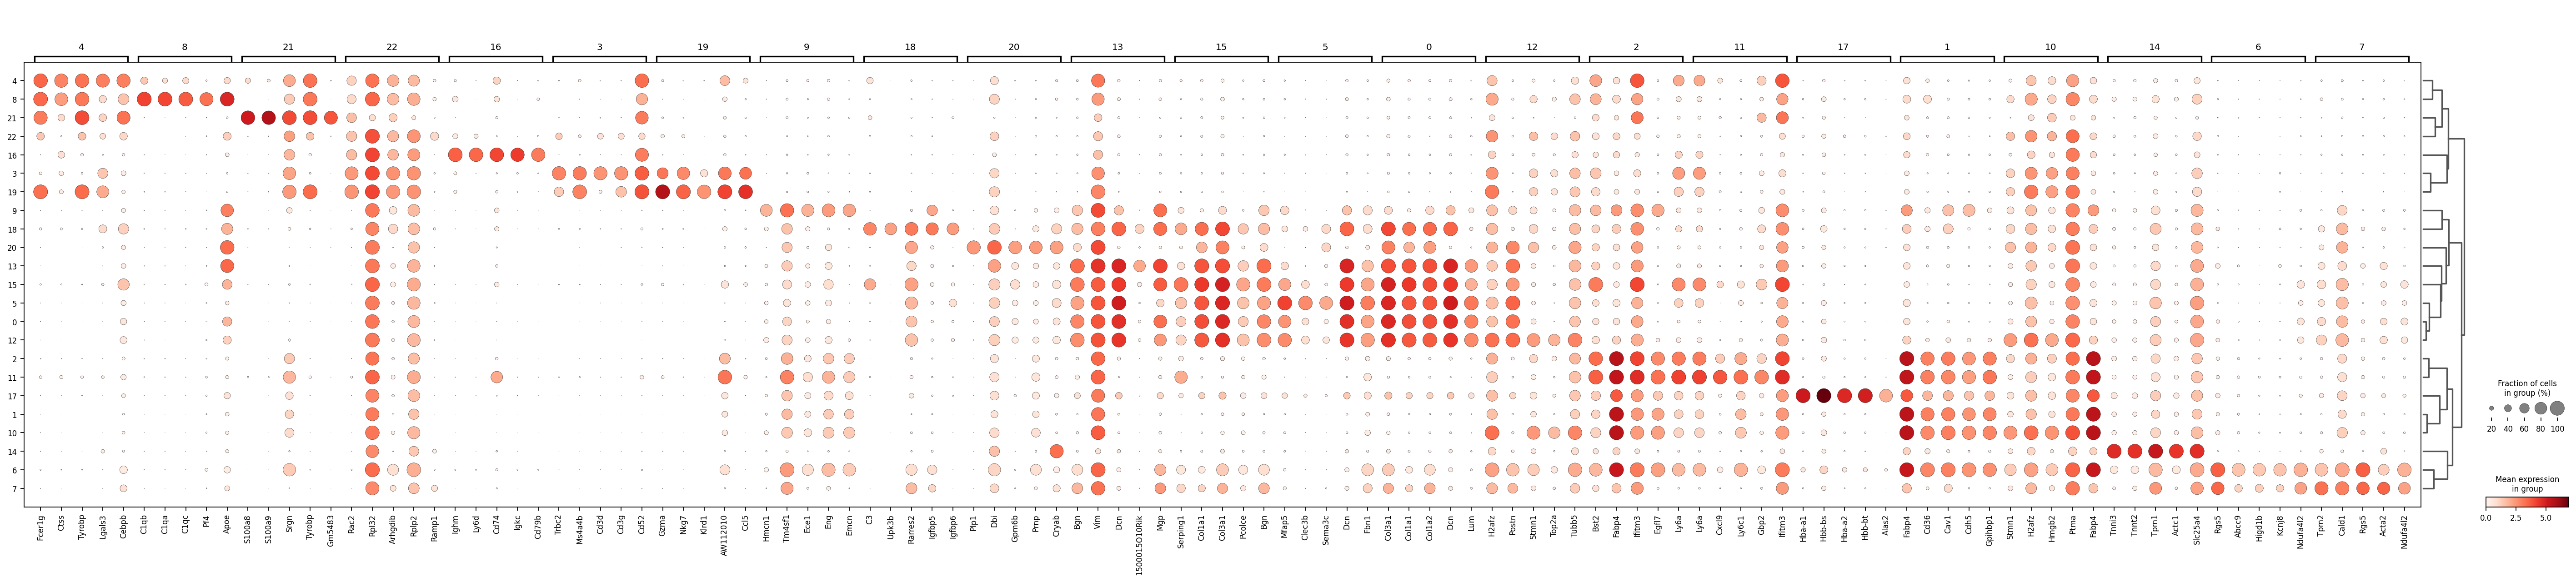

In [61]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=9, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
sc.pl.rank_genes_groups_dotplot(heart_infection_sc, key= "rank_genes_groups_leiden_0.5", n_genes=5)
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")

In [64]:
pd.DataFrame(heart_infection_sc.uns['rank_genes_groups_leiden_0.5']['names']).head(20)

0        1        2         3         4        5         6  \
0    Col3a1    Fabp4     Bst2     Trbc2    Fcer1g    Mfap5      Rgs5   
1    Col1a1     Cd36    Fabp4    Ms4a4b      Ctss   Clec3b     Abcc9   
2    Col1a2     Cav1   Ifitm3      Cd3d    Tyrobp   Sema3c    Higd1b   
3       Dcn     Cdh5    Egfl7      Cd3g    Lgals3      Dcn     Kcnj8   
4       Lum  Gpihbp1     Ly6a      Cd52     Cebpb     Fbn1  Ndufa4l2   
5     Mfap4     Mgll    Iigp1    Coro1a      Cyba    Fstl1   Colec11   
6       Bgn  Sparcl1    H2-K1   Ptprcap      Cd52    Pcsk6    Pdgfrb   
7     Postn   Col4a1     Cav1      Rac2     Prdx5  Adamts5    Steap4   
8     Fstl1      Kdr  Gpihbp1      Nkg7      Spi1      Dpt     Sept4   
9       Dpt  Tspan13    H2-D1     Ptprc      Ctsc      Gsn       Vtn   
10  Col14a1   Cavin2     Cd36   Arhgdib      Lyz2     Aspn   Gm13889   
11      Mdk     Cd93      B2m      Trac     Plac8    Timp2    Apold1   
12   Col6a1   Pecam1    Rsad2      Ccl5    Ms4a6c   S100a6    Cox4i2   
13     Rbp1    Cldn5     Gbp7    Tmsb4x      Lst1    Itih5     Itga1   
14   Igfbp7    Gng11     Ly6e      Gzmb    Ms4a4c    Itm2a     Mfge8   
15      Mgp   Col4a2    Icam2  AW112010      Ftl1  S100a10       Nes   
16   Col5a1     Kitl     Cdh5    Ms4a6b  Ifi27l2a      Axl   Sparcl1   
17     Aspn     Tcf4     Rgcc  Sh3bgrl3       B2m     Pi16      Mgll   
18      Gsn    Egfl7    Ly6c1    Epsti1      Fth1      Lum      Gjc1   
19    Mfap5    Tcf15    Cldn5       Lck      Ctsb    Fbln2     Epas1   

           7       8        9  ...             13       14        15       16  \
0       Tpm2    C1qb    Hmcn1  ...            Bgn    Tnni3  Serping1     Ighm   
1      Cald1    C1qa   Tm4sf1  ...            Vim    Tnnt2    Col1a1     Ly6d   
2       Rgs5    C1qc     Ece1  ...            Dcn     Tpm1    Col3a1     Cd74   
3      Acta2     Pf4      Eng  ...  1500015O10Rik    Actc1    Pcolce     Igkc   
4   Ndufa4l2    Apoe     Emcn  ...            Mgp  Slc25a4       Bgn    Cd79b   
5       Myl9  Fcer1g      H19  ...         Col5a2    Tnnc1     Iigp1    Cd79a   
6    Gucy1a1    Lgmn    Fabp5  ...            Cd9    Fabp3  Ifi27l2a     Cd37   
7    Gm13889  Tyrobp      Cpe  ...          Tbx20       Mb        C3    Ms4a1   
8      Csrp2    Ftl1    Aplp2  ...          Thbs1    Cox5a   Rarres2  mt-Rnr1   
9      Tagln    Ctsc    Cgnl1  ...         Col1a2  Chchd10      Apod    Iglc1   
10      Mylk    Fth1     Ctsh  ...          Itih5    Csrp3    Col1a2     Cd52   
11    Pdgfrb    Ctsb    Cdh11  ...           Dkk3    Cryab    Col5a1  mt-Rnr2   
12      Tpm1    Lyz2     Npr3  ...           Apoe      Pln        Cp    Iglc3   
13   Gucy1b1    Aif1    Ramp2  ...          Ptgis    Atp5b       B2m    H2-Aa   
14     Mfge8  Tmsb4x   Cemip2  ...         Col1a1     Mdh1     Timp1   H2-Eb1   
15      Gjc1    Ctss  Tmem108  ...          Timp3     Fhl2     H2-K1    H3f3a   
16  Ppp1r14a  Laptm5   Ctla2a  ...         Ccdc80  Ndufb10      C1ra   H2-Ab1   
17     Myh11   Csf1r      Cd9  ...          Mfap2   Cox4i1  Lgals3bp      Ltb   
18     Sept7    Dab2   Igfbp5  ...          Timp2    Myoz2    Ms4a4d    Rpl32   
19    Notch3   Rgs10    Ednrb  ...         Abi3bp  Slc25a3     Dpep1     Mzb1   

           17       18        19        20             21       22  
0      Hba-a1       C3      Gzma      Plp1         S100a8     Rac2  
1      Hbb-bs    Upk3b      Nkg7       Dbi         S100a9    Rpl32  
2      Hba-a2  Rarres2     Klrd1     Gpm6b           Srgn  Arhgdib  
3      Hbb-bt   Igfbp5  AW112010      Prnp         Tyrobp    Rplp2  
4       Alas2   Igfbp6      Ccl5     Cryab         Gm5483    Ramp1  
5        Snca    Krt19    Tyrobp     Scn7a           Il1b   Coro1a  
6        Bpgm    Aebp1    Ms4a4b     Fabp7          Msrb1    Rps11  
7       Mkrn1     Msln      Cd52    Marcks          Stfa1     Srgn  
8      Tent5c   Nkain4      Gzmb      Apoe        Stfa2l1    Limd2  
9     Fam220a    Gpm6a    Fcer1g       Cd9          Cebpb     Rps3  
10      Epb41    Timp2      Prf1    

In [65]:
heart_infection_sc.obs["celltypes_leiden_0.3"] = heart_infection_sc.obs["leiden_0.3"]
heart_infection_sc.obs["celltypes_leiden_0.5"] = heart_infection_sc.obs["leiden_0.5"]
celltypes = {'0': "Fibroblasts", 
                '1': "Endothelial cells", 
                '2': "Inflamed endothelial cells", 
                '3': "T-cells",
                '4': "Dendritic cells",
                '5': "Fibroblasts",
                '7': "Mural cells",
                '8': "Macrophages", 
                '11': "Cxcl9-high inflamed\n endothelial cells",
                '6': "Mesenchymal endothelial cells",
                '10': "Endothelial cells",
                '9': "Endocardial cells",
                '14': "Cardiomyocytes",
                '12': "Fibroblasts",
                '15': "Ccl2+ fibroblasts",
                '13': "Fibroblasts",
                '16': "B-cells",
                '17': "Erythroblasts",
                '18': "Pericardial cells",
                '19': "NK cells",
                '20': "Oligodendrocytes",
                '21': "Neutrophils",
                '22': "Neutrophils"}
heart_infection_sc.obs["celltypes_leiden_0.5"] = heart_infection_sc.obs["celltypes_leiden_0.5"].map(celltypes).astype("category")

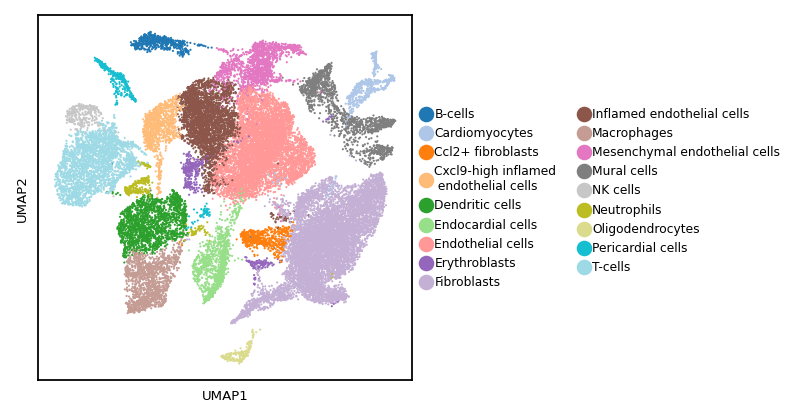

In [66]:
sc.pl.umap(heart_infection_sc, color = ['celltypes_leiden_0.5'], palette="tab20", title="")

In [ ]:
# clusters_colors = dict(
#     zip([str(i) for i in range(18)], heart_infection_sc.uns["celltypes_leiden_0.5_colors"])
# )
# final_dict = dict(zip(list(heart_infection_sc.obs["celltypes_leiden_0.5"].cat.categories), list(clusters_colors.values())))
# final_dict
# import pickle
# with open('celltypes_leiden_0.5_colors.pickle', 'wb') as handle:
#     pickle.dump(final_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [67]:
heart_infection_sc.obs["celltype_groups"] = heart_infection_sc.obs["leiden_0.5"]
celltype_groups = {'0': "Fibroblasts", 
                '1': "Endothelial cells", 
                '2': "Endothelial cells", 
                '3': "T-cells",
                '4': "Dendritic cells",
                '5': "Fibroblasts",
                '7': "Mural cells",
                '8': "Macrophages", 
                '11': "Endothelial cells",
                '6': "Endothelial cells",
                '10': "Endothelial cells",
                '9': "Endocardial cells",
                '14': "Cardiomyocytes",
                '12': "Fibroblasts",
                '15': "Fibroblasts",
                '13': "Fibroblasts",
                '16': "B-cells",
                '17': "Erythroblasts",
                '18': "Pericardial cells",
                '19': "NK cells",
                '20': "Oligodendrocytes",
                '21': "Neutrophils",
                '22': "Neutrophils"}
heart_infection_sc.obs["celltype_groups"] = heart_infection_sc.obs["celltype_groups"].map(celltype_groups).astype("category")

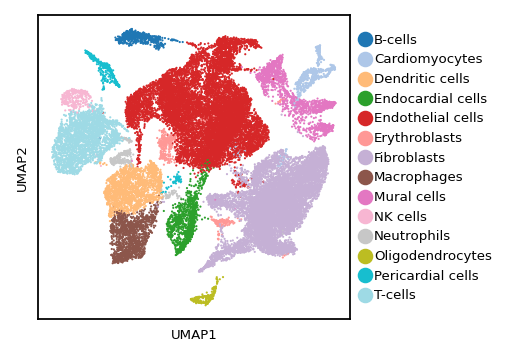

In [68]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc, color = ['celltype_groups'], legend_fontsize=6,  title="", palette="tab20")


In [69]:
# heart_infection_sc.write_h5ad(filename="./../pyobjs_github/heart_infection_sc.h5ad")

In [70]:
sc.tl.rank_genes_groups(heart_infection_sc, 'celltypes_leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_celltypes_leiden_0.5')

ranking genes
    finished: added to `.uns['rank_genes_groups_celltypes_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:03)


In [ ]:
# DGE_celltype_groups = pd.DataFrame(heart_infection_sc.uns['rank_genes_groups_celltypes_leiden_0.5']['names']).head(200)
# DGE_celltype_groups.to_csv("DGE_celltypes_leiden_0.5.csv")

In [71]:
sc.tl.rank_genes_groups(heart_infection_sc, groupby = 'condition', groups= ["T1L-WT_D4PI"],
                        reference= 'Mock_D4PI', key_added='rank_genes_T1L-WT_vs_Mock_D4PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D4PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:19)


In [ ]:
# DGE_D4 = sc.get.rank_genes_groups_df(heart_infection_sc, key='rank_genes_T1L-WT_vs_Mock_D4PI', group=["T1L-WT_D4PI"])
# DGE_D4.to_csv("DGE_D4.csv")
# print(DGE_D4.tail(40))

In [72]:
sc.tl.rank_genes_groups(heart_infection_sc, groupby = 'condition', groups= ["T1L-WT_D7PI"],
                        reference= 'Mock_D7PI', key_added='rank_genes_T1L-WT_vs_Mock_D7PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D7PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:18)


In [ ]:
# DGE_D7 = sc.get.rank_genes_groups_df(heart_infection_sc, key='rank_genes_T1L-WT_vs_Mock_D7PI', group=["T1L-WT_D7PI"])
# DGE_D7.to_csv("DGE_D7.csv")
# print(DGE_D7.tail(40))

In [73]:
sc.tl.rank_genes_groups(heart_infection_sc, groupby = 'condition', groups= ["T1L-WT_D10PI"],
                        reference= 'Mock_D10PI', key_added='rank_genes_T1L-WT_vs_Mock_D10PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D10PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


In [ ]:
# DGE_D10 = sc.get.rank_genes_groups_df(heart_infection_sc, key='rank_genes_T1L-WT_vs_Mock_D10PI', group=["T1L-WT_D10PI"])
# DGE_D10.to_csv("DGE_D10.csv")
# print(DGE_D10.tail(40))

In [74]:
# heart_infection_sc.write_h5ad(filename="./../pyobjs_github/heart_infection_sc.h5ad")

In [75]:
heart_infection_sc = sc.read_h5ad(filename="./../pyobjs_github/heart_infection_sc.h5ad")


In [76]:
heart_infection_sc

AnnData object with n_obs × n_vars = 31684 × 2247
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_groups_colors', 'celltypes_leiden_0.5_colors', 'condition_colors', 'dendrogram_leiden_0.5', 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups_leiden_0.3', 'rank_genes_groups_leiden_0.5', 